In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

Let's impose the boundary conditions by coming up with a smooth function $g:\Omega\to\mathbb{R}$ such that:

$$
g(x) = \begin{cases}
0 & \text{if } x\in\partial\Omega,\\
1 & \text{if } x\in\text{int}(\Omega).
\end{cases}
$$

We can make this function using the signed distance function of $\Omega$.
Let's take $\Omega$ to be the unit square $[0,1]\times[0,1]$.
The signed distance function of $\Omega$ is given by

$$
d(x,y) = \min\left\{
    \min\{x,1-x\},
    \min\{y,1-y\}
\right\}
$$


In [20]:
from jax import lax
import jax.numpy as jnp
from jax import jit, vmap
from functools import partial

@jit
@partial(vmap, in_axes=(0,0))
def d(x,y):
    return lax.min(lax.min(x,1-x), lax.min(y,1-y))

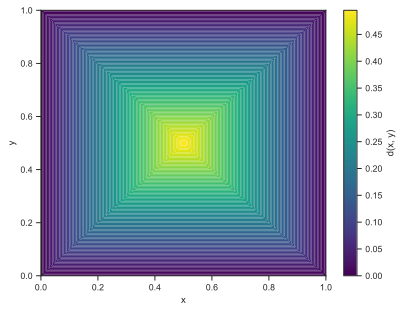

In [22]:
fig, ax = plt.subplots()
x = jnp.linspace(0, 1, 100)
y = jnp.linspace(0, 1, 100)
X, Y = jnp.meshgrid(x, y)
Z = d(X.flatten(), Y.flatten()).reshape(X.shape)
c = ax.contourf(X, Y, Z, levels=100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(c, ax=ax, label='d(x, y)')

We will transform the signed distance measure so that it is still zero on the boundary and one in the interior.
We will use the following transformation:

$$
g(x,y) = \text{sigm}(d(x,y))
$$

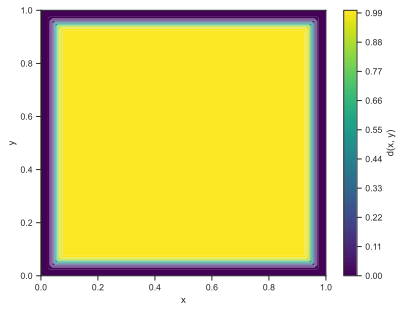

In [46]:
from jax.nn import sigmoid

g = lambda x, y: sigmoid(200*(d(x,y)-0.05))

fig, ax = plt.subplots()
x = jnp.linspace(0, 1, 100)
y = jnp.linspace(0, 1, 100)
X, Y = jnp.meshgrid(x, y)
Z = g(X.flatten(), Y.flatten()).reshape(X.shape)
c = ax.contourf(X, Y, Z, levels=100, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(c, ax=ax, label='d(x, y)')

In [47]:
g(jnp.array([0.0]), jnp.array([0.0]))

Array([4.5397872e-05], dtype=float32)